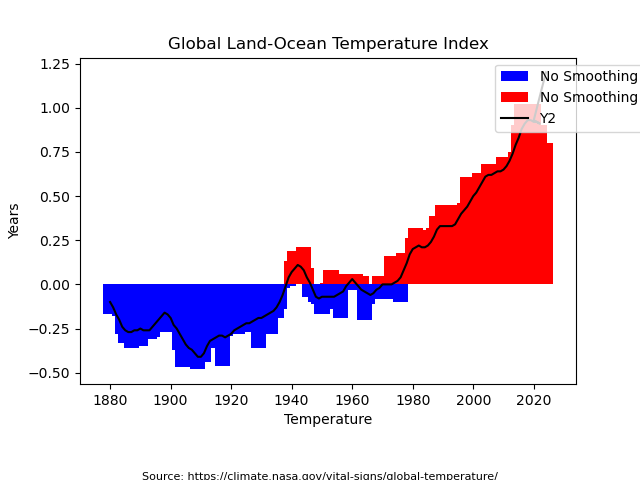

In [7]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
# import sqlalchemy
import sqlite3
import mplcursors

# Connect to the database (create it if it doesn't exist)
conn = sqlite3.connect('database.db')

# Read the data from the spreadsheet into a Pandas DataFrame
data = pd.read_excel('/Users/camillemora/GitHub/temperatures/data.xlsx')

# Write the DataFrame to the database table 'data'
data.to_sql('data', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

# Open a new connection to the database
conn = sqlite3.connect('database.db')

# Add new data to the database
new_data = pd.DataFrame({'X': [2024, 2025, 2026], 'Y': [0.5, 1.0, 0.2], 'Y2': [0.4, 1.1, 0.3]})
new_data.to_sql('data', conn, if_exists='append', index=False)

# Query the database for the updated data
database = pd.read_sql('SELECT * FROM data', conn)

# Close the database connection
conn.close()

# Read the data from the spreadsheet into a Pandas DataFrame
data = pd.read_excel('/Users/camillemora/GitHub/temperatures/data.xlsx')

x_axis = data['X']
y_axis = data['Y']
y_axis2 = data['Y2']

# make the y values less than 0 the color blue and greater than 0 the color red
bars = plt.bar(x_axis, y_axis, width=5, color=['blue' if y < 0 else 'red' for y in y_axis])

# Create the annotations
annotations = ["{:.2f}".format(temp) for temp in y_axis]

# plot the y2 values as a line
line, = plt.plot(x_axis, y_axis2, color='black')

# add a legend for Y1 that includes the colors for the both bars and the Y2 line
plt.legend(loc='upper right', handles=[bars[0], bars[-1], line], labels=['No Smoothing - negative', 'No Smoothing - positive', 'Y2'], bbox_to_anchor=(1.3, 1))

# add a caption on the figure below the plot
plt.figtext(.5, .0001, "Source: https://climate.nasa.gov/vital-signs/global-temperature/", horizontalalignment='center', fontsize=8)

# Adjust the spacing between the subplots
plt.subplots_adjust(bottom=0.2)

mplcursors.cursor(highlight='yellow')  # or just mplcursors.cursor()

# plot the data
plt.title("Global Land-Ocean Temperature Index")
plt.xlabel("Temperature")
plt.ylabel("Years")
plt.show()

# save the plot as a png file
# plt.savefig('/Users/camillemora/Jupyter/temperature.png')